#

# Problem Statement
Since I move to New York and look for a house to buy. I want to use this Kaggle dataset to train a model to help me predict the house price.
https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

# 1. EDA

In [84]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 1.1 Data Loading

In [85]:
df = pd.read_csv('/workspaces/machine-learning/midterm/data/NY-House-Dataset.csv')

In [86]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",41,-74
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",41,-74
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",41,-74
3,Brokered by COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",41,-74
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",41,-74


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## 1.2 Data Cleaning

In [88]:
df.duplicated().sum()

np.int64(214)

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df.duplicated().sum()

np.int64(0)

### Check Price Distribution

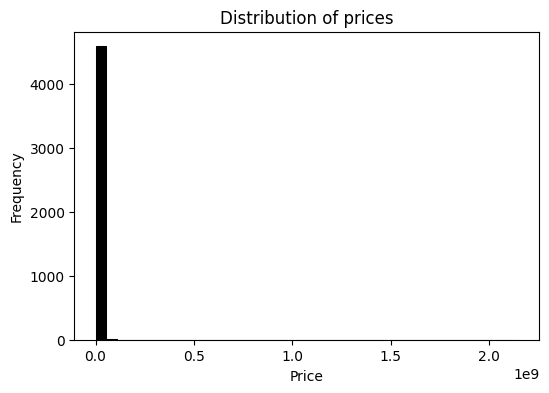

In [91]:
plt.figure(figsize=(6, 4))

sns.histplot(df['PRICE'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

### Remove Extreme Values

In [92]:
# use interquartile range to remove price outliers
upper_limit = df['PRICE'].quantile(0.94) # 6MM
lower_limit = df['PRICE'].quantile(0.02) # 170K
baths_limit = df['BATH'].quantile(0.99) # 8 BATHS
beds_limit = 10

In [93]:
outliers = df[(df['PRICE'] < lower_limit) | (df['PRICE'] > upper_limit) | (df['BATH'] > baths_limit) | (df['BEDS'] > beds_limit)]
# drop rows containing outliers
df_new = df.drop(outliers.index)

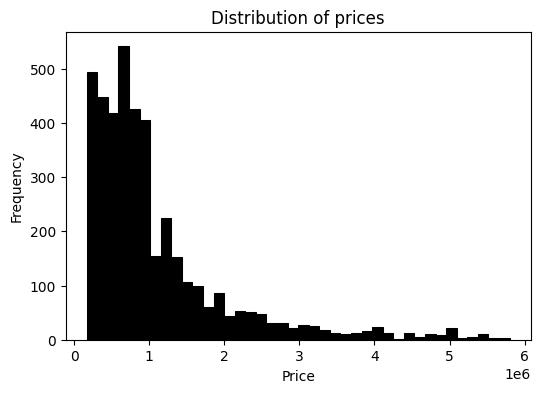

In [94]:
plt.figure(figsize=(6, 4))

sns.histplot(df_new['PRICE'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [95]:
df_new.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4144,4144,4144,4144,4144,4144
mean,1092656,3,2,1893,41,-74
std,965261,2,1,1025,0,0
min,169999,1,0,246,40,-74
25%,495000,2,1,1164,41,-74
50%,785000,3,2,2184,41,-74
75%,1295000,4,2,2184,41,-74
max,5799000,10,8,21000,41,-74


In [96]:
df_new['BEDS'].value_counts()

BEDS
3     1305
2      928
1      737
4      480
5      282
6      224
7       76
8       65
9       35
10      12
Name: count, dtype: int64

In [97]:
df_new.SUBLOCALITY.value_counts()

SUBLOCALITY
New York            871
Kings County        637
Queens County       631
Queens              510
Richmond County     450
Brooklyn            428
Bronx County        271
The Bronx           131
New York County     125
Staten Island        55
Manhattan            18
Flushing              4
Coney Island          3
Riverdale             3
East Bronx            1
Jackson Heights       1
Brooklyn Heights      1
Rego Park             1
Fort Hamilton         1
Dumbo                 1
Snyder Avenue         1
Name: count, dtype: int64

In [98]:
# Remove rows where the values in 'col1' appear less than 10 times
df_new = df_new.groupby('SUBLOCALITY').filter(lambda x: len(x) >= 10)

In [99]:
df_new.SUBLOCALITY.value_counts()

SUBLOCALITY
New York           871
Kings County       637
Queens County      631
Queens             510
Richmond County    450
Brooklyn           428
Bronx County       271
The Bronx          131
New York County    125
Staten Island       55
Manhattan           18
Name: count, dtype: int64

In [100]:
# Calculate skewness for each column
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df_new[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: 2.1559406139852455
Skewness for BEDS: 1.1737226189073253
Skewness for BATH: 1.5354520910086464
Skewness for PROPERTYSQFT: 3.9744693726345712
Skewness for LATITUDE: -0.048441738386658474
Skewness for LONGITUDE: -0.4301587795435386


## 1.3 Check Features Correlation

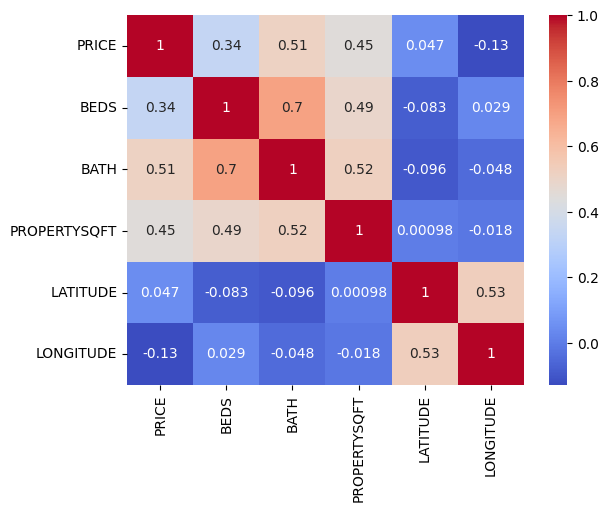

In [101]:
correlationn=pd.DataFrame()
for column in df_new.select_dtypes(include=[np.number]).columns:
    correlationn[column] = df_new[column]
relations=correlationn.corr()
sns.heatmap(relations, annot=True, cmap='coolwarm')
plt.show()


I will use the BED, BATH, PROPERTYSQFT these 3 features due to high correlationn

# 2. Model Training

In [102]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor

In [103]:
selected_cols = ['BEDS', 'BATH', 'PROPERTYSQFT','SUBLOCALITY','PRICE']
subset_df = df_new[selected_cols]

In [104]:
subset_df.head()

,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE
0,2,2,1400,Manhattan,315000
2,4,2,2015,Richmond County,260000
5,5,2,4004,Kings County,690000
6,2,2,2184,New York,899500
9,2,1,978,Brooklyn,440000


In [105]:
def train_val_test_split(df, target, train_size, val_size, test_size, random_state):
    
    df_full_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    val_portion = val_size / (train_size + val_size)
    df_train, df_val = train_test_split(df_full_train, test_size=val_portion, random_state=random_state)

    df_full_train = df_full_train.reset_index(drop=True)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_full_train = df_full_train[target].values
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_full_train[target]
    del df_train[target]
    del df_val[target]
    del df_test[target]

    return df_full_train, df_train, df_test, df_val, y_full_train, y_train, y_val, y_test

In [106]:
X_full_train, X_train, X_test, X_val, y_full_train, y_train, y_val, y_test = \
    train_val_test_split(df=subset_df, target='PRICE', train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)

In [107]:
def train_rf(df_train, y_train, random_state, n_estimators):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(dicts)

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [108]:
dv, rf_model = train_rf(df_train=X_train, y_train=y_train, random_state=1, n_estimators=10)
y_pred = predict(df=X_test, dv=dv, model=rf_model)
round(rmse(y_test, y_pred),3)

np.float64(606596.815)

In [109]:
y_pred,y_val
compare = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
pd.set_option('display.float_format', '{:.0f}'.format)
# Display the DataFrame
print(compare)

     y_pred   y_test
0    858679   839000
1    825700  1080000
2    253085   184888
3   1892083  1900000
4    884297   599000
..      ...      ...
408 1025033   325000
409  696862   858000
410  232000   235000
411 2044761  3500000
412 1063400  1300000

[413 rows x 2 columns]


## 2.1 Performance Tuning

In [110]:
def train_rf2(df_train, y_train, n_estimators, depth):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(dicts)

    model = RandomForestRegressor(max_depth=depth, n_estimators=n_estimators, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train)
    
    return dv, model

In [111]:
all_rmse = {}
for depth in [10, 15, 20, 25]:
    print('depth: %s' % depth)
    rmse_vals = []
    for i in range(10, 201, 10):
        dv, rf_model = train_rf2(df_train=X_train, y_train=y_train, n_estimators=i, depth=depth)
        y_pred = predict(df=X_val, dv=dv, model=rf_model)
        rmse_val = round(rmse(y_val, y_pred),3)
        # print('%s -> %.3f' % (i, rmse_val))
        rmse_vals.append(rmse_val)
    all_rmse[depth] = np.mean(rmse_vals)

depth: 10
depth: 15
depth: 20
depth: 25


In [112]:
all_rmse

{10: np.float64(593468.5112000001),
 15: np.float64(609114.1866499999),
 20: np.float64(613882.1876000001),
 25: np.float64(614778.13155)}

depth use 20 

In [113]:
all_rmse_dep20 = {}

for i in range(10, 201, 10):
    dv, rf_model = train_rf2(df_train=X_train, y_train=y_train, n_estimators=i, depth=10)
    y_pred = predict(df=X_val, dv=dv, model=rf_model)
    rmse_val = round(rmse(y_val, y_pred),3)
    print('%s -> %.3f' % (i, rmse_val))
    all_rmse_dep20[i] = rmse_val

10 -> 588790.700
20 -> 588302.253
30 -> 590587.596
40 -> 591742.294
50 -> 590313.991
60 -> 590510.692
70 -> 592584.816
80 -> 592307.824
90 -> 592670.521
100 -> 593681.605
110 -> 593208.097
120 -> 595173.894
130 -> 595197.268
140 -> 595439.356
150 -> 595659.215
160 -> 595573.161
170 -> 596937.630
180 -> 596606.501
190 -> 596945.331
200 -> 597137.479


n_estimator use 10

## 2.2 Feature Importance

In [114]:
dv, rf_model = train_rf2(df_train=X_train, y_train=y_train, n_estimators=10, depth=10)

In [115]:
# Get feature importances
importances = rf_model.feature_importances_

# Print feature importances
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Feature 0: 0.3270
Feature 1: 0.0603
Feature 2: 0.3230
Feature 3: 0.0047


## 3. Export the model

In [116]:
import pickle

In [117]:
# Save the model to a file
with open('model.bin', 'wb') as f:
    pickle.dump(rf_model, f)

In [118]:
# To load the model
with open('model.bin', 'rb') as f:
    loaded_model = pickle.load(f)

In [119]:
X_test.head()

,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,4,2,2184,Queens County
1,5,2,2570,Bronx County
2,3,1,500,Queens
3,2,2,1035,New York
4,3,2,2184,Queens County


In [120]:
# Predict Price
test_json = {"BEDS": 4, "BATH": 2, "PROPERTYSQFT": 2184, "SUBLOCALITY": "Queens County"}
X = dv.transform([test_json])
loaded_model.predict(X)

array([874592.91561928])

In [121]:
# Actual Price
y_test[0]

np.int64(839000)